#Importing the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/datasets/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#Data Cleaning

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

#Questions To Be Asked

* What is the total number of restaurants in the dataset?
* How many of the restaurants offer online ordering?
* How many of the restaurants have the option of booking a table?
* What is the most common type of restaurant in Bangalore?
* Which location has the highest number of restaurants?
* How many restaurants have a rating of 4 or higher?
* What is the average number of votes received by a restaurant?
* Which restaurant has the most number of votes?
* How many restaurants have more than 1000 votes?
* What percentage of restaurants have a menu available on Zomato?
* What percentage of restaurants allow online ordering and table booking?
* What is the relationship between the number of votes and the rating for restaurants in different locations and cuisines?
* How do the cuisines offered by restaurants vary across different locations and what are the most popular cuisines in each location?

# What is the total number of restaurants in the dataset?

In [7]:
num_restaurants = df.shape[0]

print("Total number of restaurants in the dataset: ", num_restaurants)

Total number of restaurants in the dataset:  51717


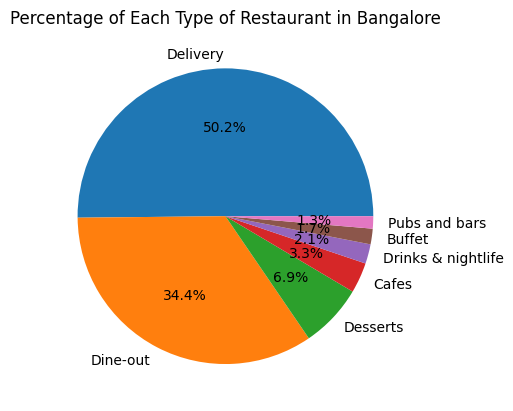

In [8]:
restaurant_count = df['listed_in(type)'].value_counts()
plt.pie(restaurant_count, labels=restaurant_count.index, autopct='%1.1f%%')
plt.title('Percentage of Each Type of Restaurant in Bangalore')
plt.show()

# How many of the restaurants offer online ordering?

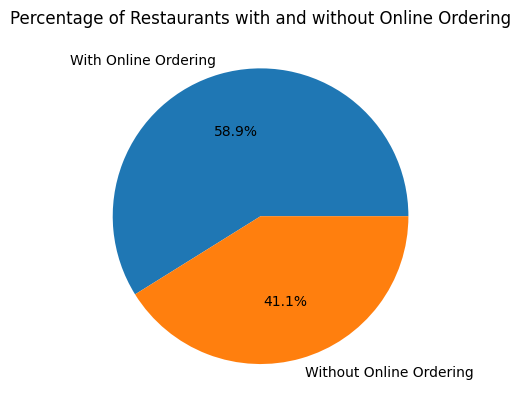

In [9]:
online_order_count = df['online_order'].value_counts()
plt.pie(online_order_count, labels=['With Online Ordering', 'Without Online Ordering'], autopct='%1.1f%%')
plt.title('Percentage of Restaurants with and without Online Ordering')
plt.show()

# How many of the restaurants have the option of booking a table?

In [10]:
book_table_count = df['book_table'].value_counts()
print("Number of restaurants with table booking: ", book_table_count[1])
print("Number of restaurants without table booking: ", book_table_count[0])

Number of restaurants with table booking:  6449
Number of restaurants without table booking:  45268


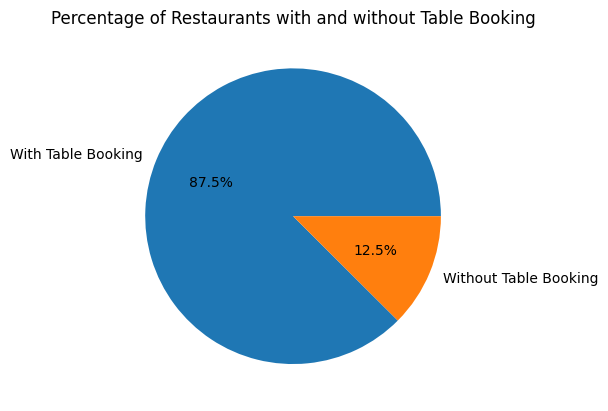

In [11]:
# Count the number of restaurants with and without table booking
#book_table_count = df['book_table'].value_counts()
plt.pie(book_table_count, labels=['With Table Booking', 'Without Table Booking'], autopct='%1.1f%%')
plt.title('Percentage of Restaurants with and without Table Booking')
plt.show()

# What is the most common type of restaurant in Bangalore?

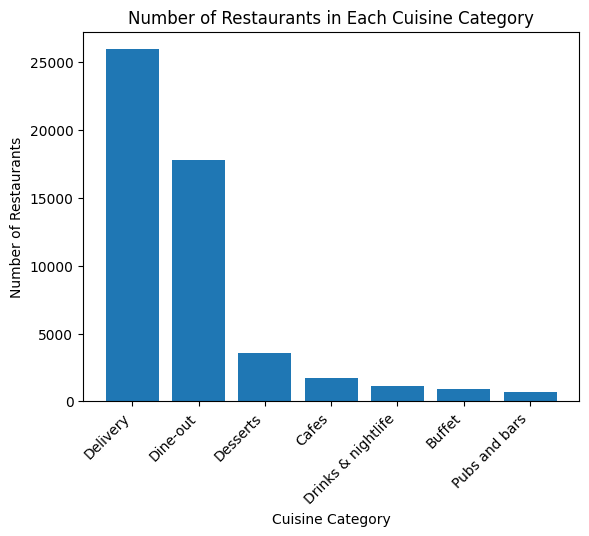

In [12]:
cuisine_counts = df['listed_in(type)'].value_counts()
plt.bar(cuisine_counts.index, cuisine_counts)
plt.title('Number of Restaurants in Each Cuisine Category')
plt.xlabel('Cuisine Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

# Which location has the highest number of restaurants?

In [13]:
location_counts = df['location'].value_counts()
print("The location with the highest number of restaurants is:", location_counts.index[0])

The location with the highest number of restaurants is: BTM


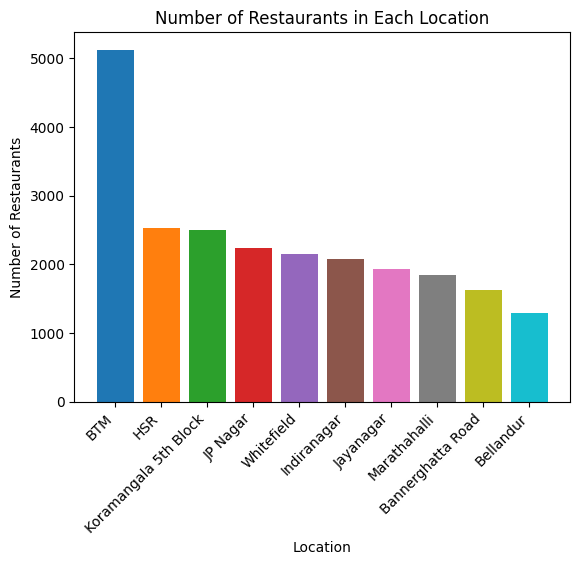

In [14]:
location_counts = df['location'].value_counts().nlargest(10)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.bar(location_counts.index, location_counts, color=colors)
plt.title('Number of Restaurants in Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

# How many restaurants have a rating of 4 or higher?

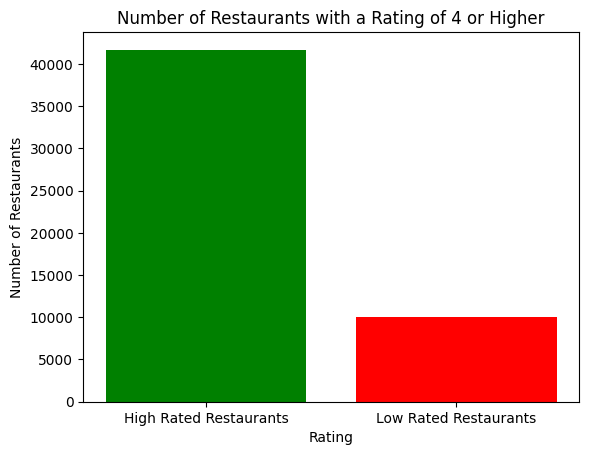

In [15]:
high_rated_restaurants = df[df['votes'] >= 4]['votes'].count()
low_rated_restaurants = df[df['votes'] < 4]['votes'].count()
plt.bar(['High Rated Restaurants', 'Low Rated Restaurants'], [high_rated_restaurants, low_rated_restaurants], color=['green', 'red'])

plt.title('Number of Restaurants with a Rating of 4 or Higher')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# What is the average number of votes received by a restaurant?

In [16]:
avg_rating = df['votes'].mean()
print(f"The average rating of restaurants in Bangalore is {avg_rating:.2f}")

The average rating of restaurants in Bangalore is 283.70


# Which restaurant has the most number of votes?

In [17]:
most_voted_idx = df['votes'].idxmax()
most_voted_restaurant = df.loc[most_voted_idx, 'name']
print(f"The restaurant with the most number of votes is {most_voted_restaurant}")

The restaurant with the most number of votes is Byg Brewski Brewing Company


# How many restaurants have more than 1000 votes?

In [18]:
more_than_1000_votes = df['votes'] > 1000
selected_rows = df[more_than_1000_votes]
num_restaurants = selected_rows.shape[0]
print(f"There are {num_restaurants} restaurants with more than 1000 votes.")

There are 3648 restaurants with more than 1000 votes.


# What percentage of restaurants have a menu available on Zomato?

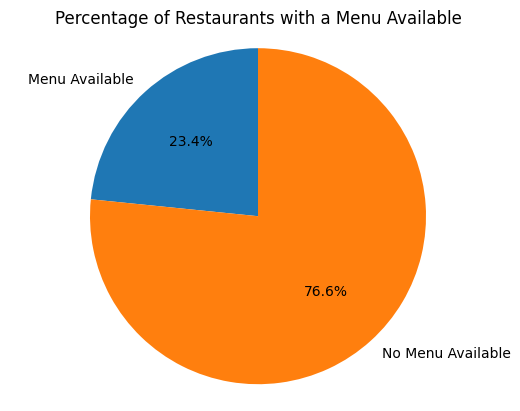

In [19]:
menu_available = df[df['menu_item'] != '[]'].shape[0]
percent_menu_available = menu_available / df.shape[0] * 100

labels = ['Menu Available', 'No Menu Available']
sizes = [percent_menu_available, 100 - percent_menu_available]

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Restaurants with a Menu Available')
plt.axis('equal')
plt.show()

# What percentage of restaurants allow online ordering and table booking?

In [20]:
online_order_count = df["online_order"].value_counts()["Yes"]
book_table_count = df["book_table"].value_counts()["Yes"]
online_order_percentage = (online_order_count / len(df)) * 100
book_table_percentage = (book_table_count / len(df)) * 100

print("Percentage of restaurants that allow online ordering:", online_order_percentage)
print("Percentage of restaurants that allow table booking:", book_table_percentage)

Percentage of restaurants that allow online ordering: 58.86652358025407
Percentage of restaurants that allow table booking: 12.4697874973413


# What is the relationship between the number of votes and the rating for restaurants in different locations and cuisines?

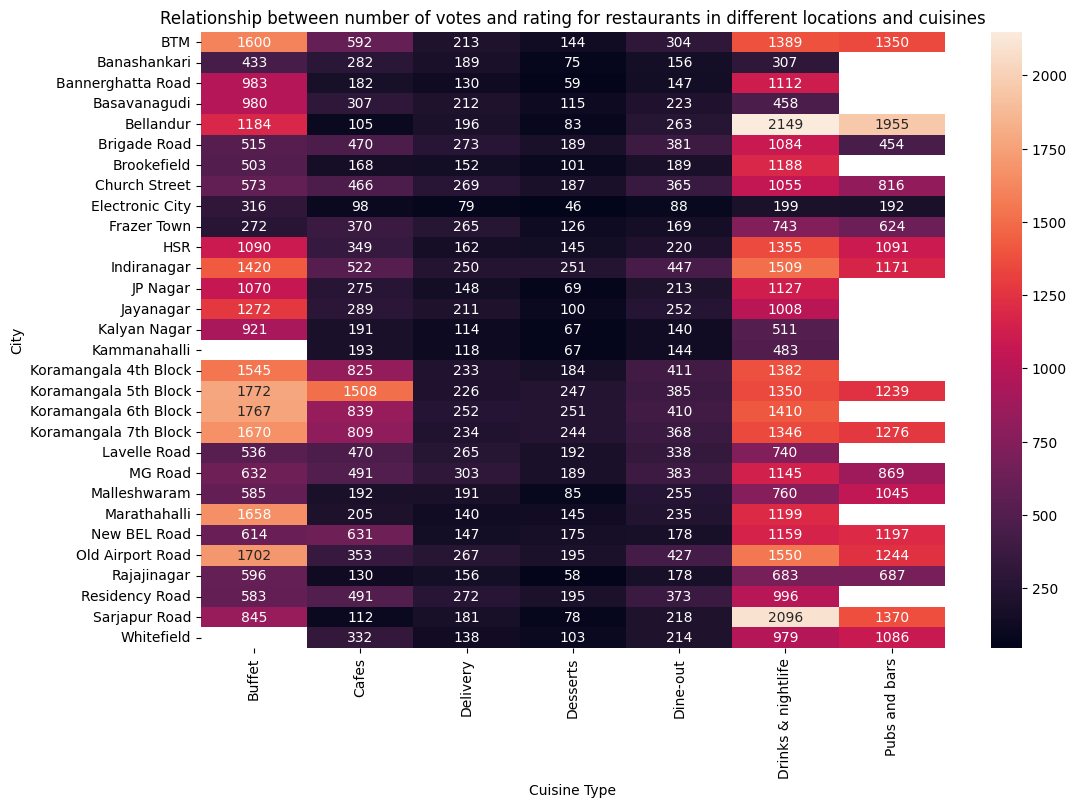

In [21]:
df_votes = df[['name', 'votes', 'listed_in(city)', 'listed_in(type)']]
df_votes_grouped = df_votes.groupby(['listed_in(city)', 'listed_in(type)']).mean().reset_index()
df_pivot = pd.pivot_table(df_votes_grouped, values='votes', index=['listed_in(city)'], columns=['listed_in(type)'])

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap='rocket', annot=True, fmt='.0f')
plt.title('Relationship between number of votes and rating for restaurants in different locations and cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('City')
plt.show()

# How do the cuisines offered by restaurants vary across different locations and what are the most popular cuisines in each location?

In [22]:
cuisine_counts = df.groupby(['listed_in(city)', 'cuisines']).agg({'name': 'count'}).reset_index()
cuisine_counts = cuisine_counts.sort_values(['listed_in(city)', 'name'], ascending=[True, False])
popular_cuisines = cuisine_counts.groupby('listed_in(city)').first().reset_index()
print(popular_cuisines[['listed_in(city)', 'cuisines']])

          listed_in(city)               cuisines
0                     BTM           North Indian
1            Banashankari           South Indian
2       Bannerghatta Road  North Indian, Chinese
3            Basavanagudi           South Indian
4               Bellandur           North Indian
5            Brigade Road           North Indian
6             Brookefield           North Indian
7           Church Street           North Indian
8         Electronic City  North Indian, Chinese
9             Frazer Town           North Indian
10                    HSR           North Indian
11            Indiranagar           North Indian
12               JP Nagar           North Indian
13              Jayanagar           North Indian
14           Kalyan Nagar  North Indian, Chinese
15           Kammanahalli  North Indian, Chinese
16  Koramangala 4th Block           North Indian
17  Koramangala 5th Block           North Indian
18  Koramangala 6th Block           North Indian
19  Koramangala 7th 